In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("D:/Guvi/Projects/Flight/Data/Passenger_Satisfaction.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [5]:
#310 Na is 0.002% of total data so less impact hence droping it off 
df.dropna(inplace=True)

In [6]:
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [7]:
df["Customer Type"]= df["Customer Type"].apply(lambda X:1 if X=='Loyal Customer' else 0)

In [8]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,1,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,0,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,1,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,1,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,1,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,0,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,1,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,0,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,0,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


### EDA

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [10]:
df["satisfaction"].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [11]:
#changing the categorical to numrical for bettern EDA 
df["satisfaction"]= df["satisfaction"].apply(lambda X:1 if X=="satisfied" else 0)

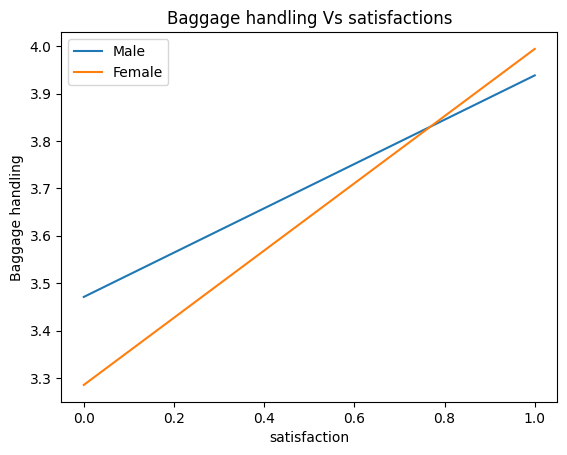

In [12]:
#baggage to satisfaction
sns.lineplot(data=df, x="satisfaction", y="Baggage handling", hue="Gender", errorbar=None)
plt.title("Baggage handling Vs satisfactions")
plt.legend()
plt.show()

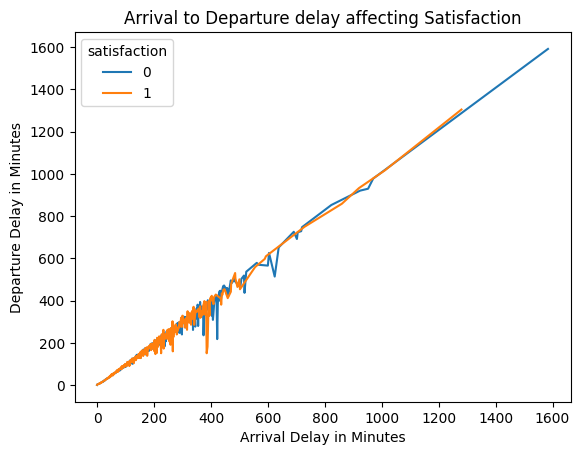

In [13]:
sns.lineplot(x=df["Arrival Delay in Minutes"], y=df["Departure Delay in Minutes"], hue=df["satisfaction"] ,errorbar=None)
plt.title("Arrival to Departure delay affecting Satisfaction")
plt.show()

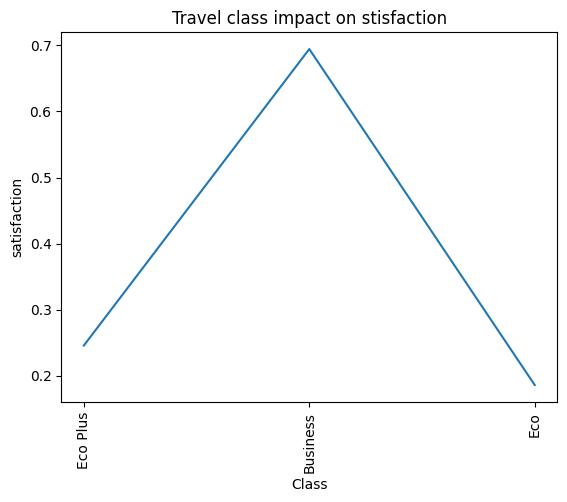

In [14]:
sns.lineplot(data=df, x="Class", y="satisfaction",errorbar=None)
plt.title("Travel class impact on stisfaction")
plt.xticks(rotation = 90)
plt.show()

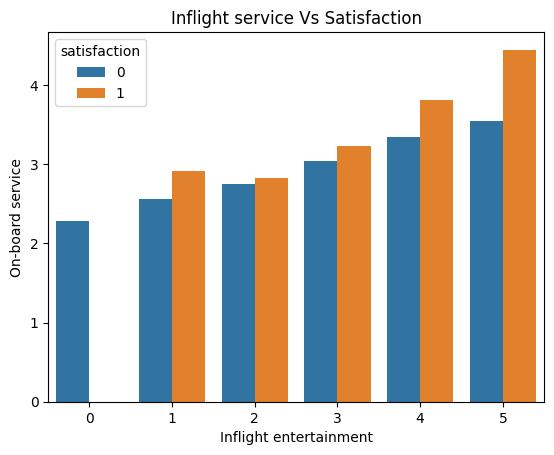

In [15]:
sns.barplot(data=df, x="Inflight entertainment", y="On-board service", hue="satisfaction", errorbar=None)
plt.title("Inflight service Vs Satisfaction")
plt.show()

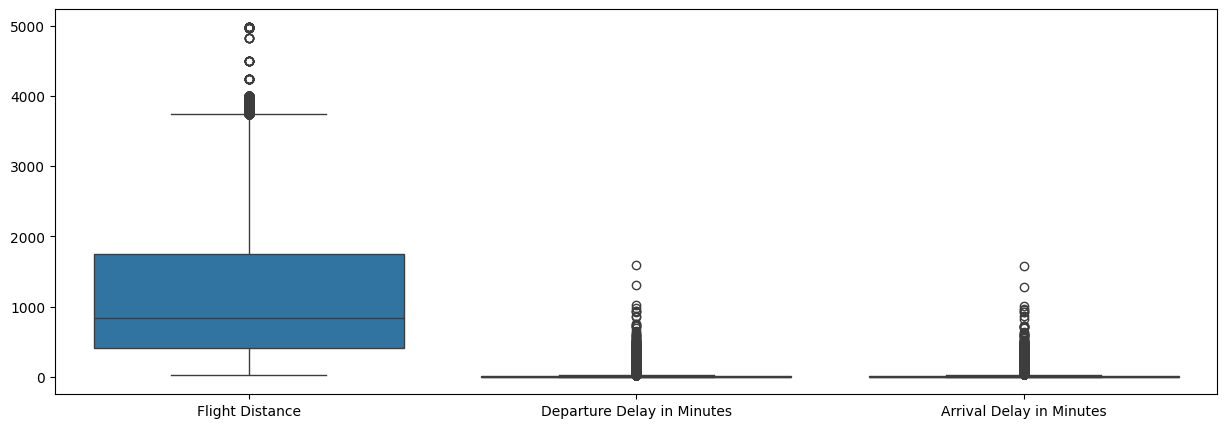

In [16]:
#outliers 
col_plots = ["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes" ]
plt.figure(figsize=(15,5))
sns.boxplot(df[col_plots])
plt.show()

### Encoding

In [17]:
df = pd.get_dummies(df, columns=["Gender", "Type of Travel", "Class"] , dtype=int, drop_first=True)
df

,Unnamed: 0,id,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0,70172,1,13,460,3,4,3,1,5,...,4,5,5,25,18.0,0,1,1,0,1
1,1,5047,0,25,235,3,2,3,3,1,...,1,4,1,1,6.0,0,1,0,0,0
2,2,110028,1,26,1142,2,2,2,2,5,...,4,4,5,0,0.0,1,0,0,0,0
3,3,24026,1,25,562,2,5,5,5,2,...,1,4,2,11,9.0,0,0,0,0,0
4,4,119299,1,61,214,3,3,3,3,4,...,3,3,3,0,0.0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,0,23,192,2,1,2,3,2,...,2,3,2,3,0.0,0,0,0,1,0
103900,103900,73097,1,49,2347,4,4,4,4,2,...,5,5,4,0,0.0,1,1,0,0,0
103901,103901,68825,0,30,1995,1,1,1,3,4,...,5,5,4,7,14.0,0,1,0,0,0
103902,103902,54173,0,22,1000,1,1,1,5,1,...,5,4,1,0,0.0,0,0,0,1,0


### ML(Machine Learning)

In [18]:
#for ML 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

#for metrics 
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

#def X and y 
X= df.drop(columns=["satisfaction"], axis=1)
y=df["satisfaction"]


models = [LogisticRegression(max_iter=5000,), RandomForestClassifier(n_estimators=100, random_state=42), KNeighborsClassifier(),
          XGBClassifier(random_state=42), DecisionTreeClassifier()]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#stnadardized 
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [19]:
#training and metrics 
for mod in models:
    if isinstance(mod, (LogisticRegression, KNeighborsClassifier)):
        mod.fit(X_train_scaled, y_train)
        test_prediction = mod.predict(X_test_scaled)
    else:
        mod.fit(X_train, y_train)
        test_prediction=mod.predict(X_test)
 

    acc= accuracy_score(y_test, test_prediction)
    pres = precision_score(y_test, test_prediction)
    f1= f1_score(y_test, test_prediction)
    auc_score = roc_auc_score(y_test, test_prediction)


    print(f"The model is :{type(mod).__name__}")
    print(f"accuracy :{acc:.4f}")
    print(f"precision :{pres:.4f}")
    print(f"f1 :{f1:.4f}")
    print(f"auc :{auc_score:.4f}")
    print("----------------------------------")
    print("\n")


The model is :LogisticRegression
accuracy :0.8749
precision :0.8768
f1 :0.8532
auc :0.8700
----------------------------------


The model is :RandomForestClassifier
accuracy :0.9633
precision :0.9752
f1 :0.9572
auc :0.9607
----------------------------------


The model is :KNeighborsClassifier
accuracy :0.9253
precision :0.9486
f1 :0.9113
auc :0.9199
----------------------------------


The model is :XGBClassifier
accuracy :0.9648
precision :0.9726
f1 :0.9592
auc :0.9627
----------------------------------


The model is :DecisionTreeClassifier
accuracy :0.9446
precision :0.9355
f1 :0.9368
auc :0.9439
----------------------------------




In [20]:
#pickling the best model 

xgb_class = XGBClassifier()
xgb_class.fit(X_train, y_train)

import pickle

with open("best_class.pkl", "wb") as f:
    pickle.dump(xgb_class,f)

### ML flow

In [23]:
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Passenger satisfaction")

models = [LogisticRegression(max_iter=5000,), RandomForestClassifier(n_estimators=100, random_state=42), KNeighborsClassifier(),
          XGBClassifier(random_state=42), DecisionTreeClassifier()]

for model in models:
    model_name = type(model).__name__

    with mlflow.start_run(run_name=model_name):
        
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)

        acc= accuracy_score(y_test, prediction)
        pres = precision_score(y_test, prediction)
        f1= f1_score(y_test, prediction)
        auc_score = roc_auc_score(y_test, prediction)

        mlflow.log_metric('accuracy', acc) 
        mlflow.log_metric('precison', pres)
        mlflow.log_metric('f1',f1)
        mlflow.log_metric('auc_score', auc_score)


        mlflow.sklearn.log_model(model, artifact_path=model_name)
        print(f"Logged : {model_name}")

c:\Users\TEMP\Anaconda\envs\stat_viz\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/08/15 12:23:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/15 12:23:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged : LogisticRegression
🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/275005321067793119/runs/6c98429e8bdc4540b4e54a5ab89e842d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/275005321067793119


2025/08/15 12:23:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/15 12:23:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged : RandomForestClassifier
🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/275005321067793119/runs/6d3815f9bd1f4efbaee96dc2982de81f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/275005321067793119


2025/08/15 12:23:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/15 12:23:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged : KNeighborsClassifier
🏃 View run KNeighborsClassifier at: http://127.0.0.1:5000/#/experiments/275005321067793119/runs/8136b70bcc704d9589f1e4332c9a44be
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/275005321067793119


2025/08/15 12:23:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/15 12:23:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged : XGBClassifier
🏃 View run XGBClassifier at: http://127.0.0.1:5000/#/experiments/275005321067793119/runs/c6d4af0e287248229398bccd07d1d7b5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/275005321067793119


2025/08/15 12:23:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/15 12:23:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged : DecisionTreeClassifier
🏃 View run DecisionTreeClassifier at: http://127.0.0.1:5000/#/experiments/275005321067793119/runs/fa20777bf4694633b343deb3e714c6af
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/275005321067793119


#### Registering

In [25]:
model_uri = "runs:/c6d4af0e287248229398bccd07d1d7b5/XGBClassifier"
mlflow.register_model(model_uri=model_uri, name="XGBoost passenger classifier")

Registered model 'XGBoost passenger classifier' already exists. Creating a new version of this model...
2025/08/15 12:24:59 WARNING mlflow.tracking._model_registry.fluent: Run with id c6d4af0e287248229398bccd07d1d7b5 has no artifacts at artifact path 'XGBClassifier', registering model based on models:/m-1208083ba68648548d012ac14e64fb2d instead
2025/08/15 12:24:59 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost passenger classifier, version 1
Created version '1' of model 'XGBoost passenger classifier'.


<ModelVersion: aliases=[], creation_timestamp=1755240899791, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1755240899791, metrics=None, model_id=None, name='XGBoost passenger classifier', params=None, run_id='c6d4af0e287248229398bccd07d1d7b5', run_link='', source='models:/m-1208083ba68648548d012ac14e64fb2d', status='READY', status_message=None, tags={}, user_id='', version='1'>